# Wildlife Classification

In this jupyter notebook, I'll be taking a set of images and training different machine learning models on them to try and create a model that is better than the baseline model accuracy.

In [11]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from PIL import Image
from tqdm import tqdm
from pathlib import Path
from sklearn.model_selection import train_test_split
%matplotlib inline

In [12]:
# Reading in the csv's with the images
train_features = pd.read_csv("train_features.csv", index_col="id")
test_features = pd.read_csv("test_features.csv", index_col="id")
train_labels = pd.read_csv("train_labels.csv", index_col="id")

In [13]:
# Looking at our train_features dataset
train_features.head()

,filepath,site
id,,
ZJ000000,train_features/ZJ000000.jpg,S0120
ZJ000001,train_features/ZJ000001.jpg,S0069
ZJ000002,train_features/ZJ000002.jpg,S0009
ZJ000003,train_features/ZJ000003.jpg,S0008
ZJ000004,train_features/ZJ000004.jpg,S0036


In [14]:
# Looking at our test_features dataset
test_features.head()

,filepath,site
id,,
ZJ016488,test_features/ZJ016488.jpg,S0082
ZJ016489,test_features/ZJ016489.jpg,S0040
ZJ016490,test_features/ZJ016490.jpg,S0040
ZJ016491,test_features/ZJ016491.jpg,S0041
ZJ016492,test_features/ZJ016492.jpg,S0040


In [15]:
# Looking at our train_labels. These must be the animals we will be trying to classify
train_labels.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
# Creating a list of the column names so we can see the animals in the dataset as well for iteration purposes
species_labels = sorted(train_labels.columns.unique())
species_labels

['antelope_duiker',
 'bird',
 'blank',
 'civet_genet',
 'hog',
 'leopard',
 'monkey_prosimian',
 'rodent']

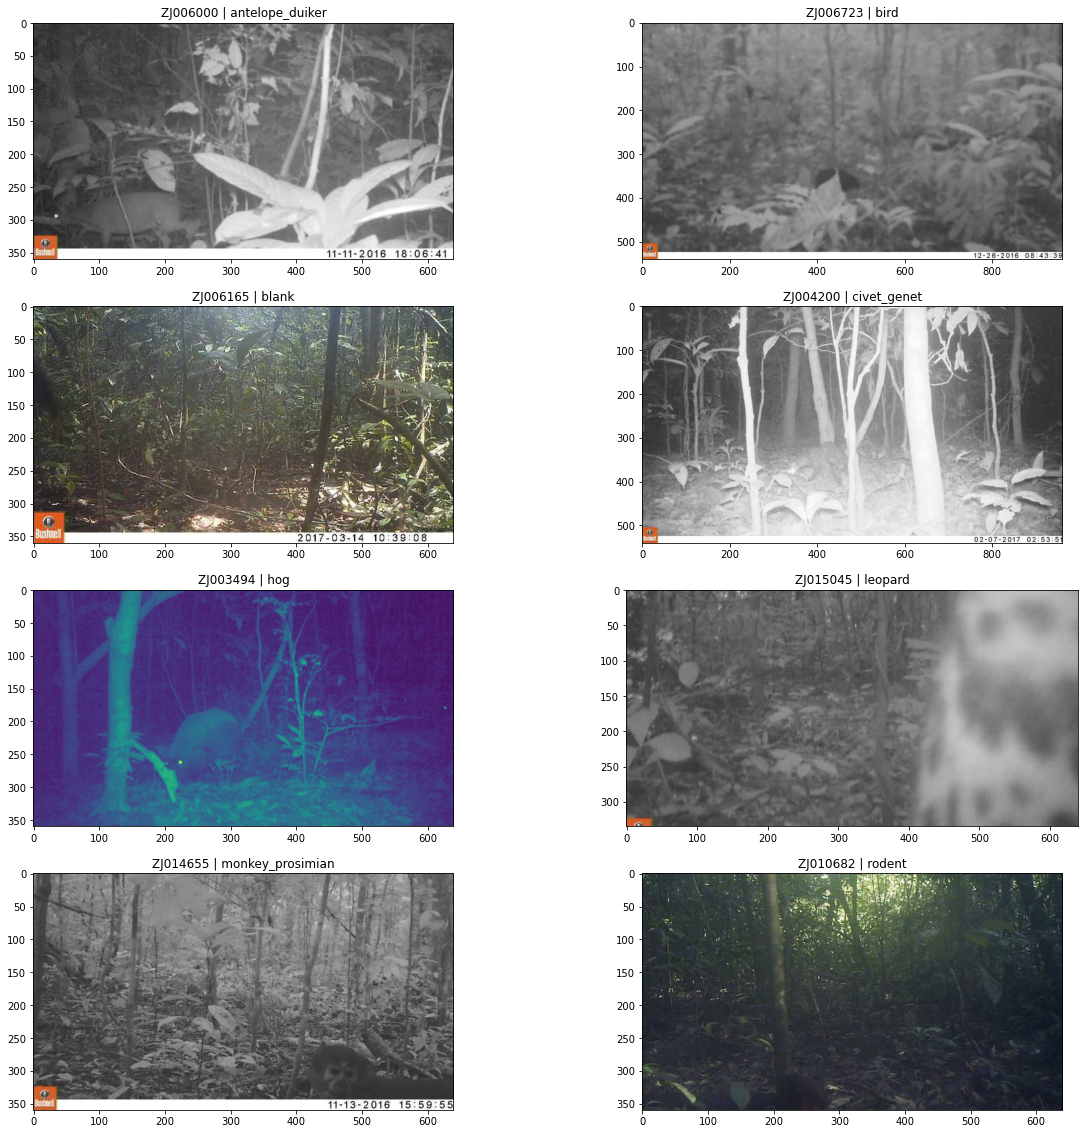

In [17]:
# we'll create a grid with 8 positions, one for each label (7 species, plus blanks)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# iterate through each species
for species, ax in zip(species_labels, axes.flat):
    # get an image ID for this species
    img_id = (
        train_labels[train_labels.loc[:,species] == 1]
        .sample(1, random_state=42)
        .index[0]
    )
    # reads the filepath and returns a numpy array
    img = mpimg.imread(train_features.loc[img_id].filepath)
    # plot etc
    ax.imshow(img)
    ax.set_title(f"{img_id} | {species}")

In [18]:
# Looking at the number of images in our dataset
train_labels.sum().sum()

16488.0

In [19]:
# Taking a look at the distribution for animals in the images.
train_labels.sum().sort_values(ascending=False)

monkey_prosimian    2492.0
antelope_duiker     2474.0
civet_genet         2423.0
leopard             2254.0
blank               2213.0
rodent              2013.0
bird                1641.0
hog                  978.0
dtype: float64

In [20]:
# Look at the percentage of animals in the dataset
train_labels.sum().divide(train_labels.shape[0]).sort_values(ascending=False)

monkey_prosimian    0.151140
antelope_duiker     0.150049
civet_genet         0.146955
leopard             0.136705
blank               0.134219
rodent              0.122089
bird                0.099527
hog                 0.059316
dtype: float64

In [15]:
# Making sure there are no null values
train_features.isna().sum()

filepath    0
site        0
dtype: int64

In [16]:
# Looks like all train_feature rows are unique
train_features.describe(include='O')

,filepath,site
count,16488,16488
unique,16488,148
top,train_features/ZJ007944.jpg,S0060
freq,1,1132


In [17]:
# Making sure there are no null values
test_features.isna().sum()

filepath    0
site        0
dtype: int64

In [18]:
# Looks like all test_feature rows are unique
test_features.describe(include='O')

,filepath,site
count,4464,4464
unique,4464,51
top,test_features/ZJ020479.jpg,S0040
freq,1,495


In [19]:
# Checking all rows to make sure there are no null values.
train_labels.isna().sum()

antelope_duiker     0
bird                0
blank               0
civet_genet         0
hog                 0
leopard             0
monkey_prosimian    0
rodent              0
dtype: int64

# Train-Test Split

Now that we've had a look at our dataset and understand that everything looks like it is in order, we can move on to the train-test split.

In [21]:
# Setting up the train-test split
y = train_labels
x = train_features.loc[y.index].filepath.to_frame()

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    test_size=0.25, random_state=42)

In [22]:
# Sanity check
x_train.head()

,filepath
id,
ZJ013653,train_features/ZJ013653.jpg
ZJ012257,train_features/ZJ012257.jpg
ZJ013164,train_features/ZJ013164.jpg
ZJ013787,train_features/ZJ013787.jpg
ZJ002292,train_features/ZJ002292.jpg


In [23]:
# Sanity check
y_train.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ013653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ012257,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ZJ013164,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ013787,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZJ002292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# Looks like everything matches up with our train-test split! Yay!
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12366, 1), (4122, 1), (12366, 8), (4122, 8))

Come back here if we want to try PyTorch splitting like they do in the baseline.

# Modeling

## Baseline Model

Our baseline model for this image classification is going to be if we randomly guessed 1 of the animal classes for every image. This would give us an accuracy of 12.5% (1/8). We could also use the `monkey_prosimian    0.151140` as our baseline for a 15.11% accuracy. Let's try to imporove this by moving on to a simple logistic regression model.

## Logistic Regression

In [26]:
# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

ValueError: could not convert string to float: 'train_features/ZJ013653.jpg'

# Initial Neural Net Model

This is a modification of the initial Nerual Net model used for the competition. We use 100% of the training data, with 75% being our train set and 25% being our test set.

In [25]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms


class ImagesDataset(Dataset):
    """Reads in an image, transforms pixel values, and serves
    a dictionary containing the image id, image tensors, and label.
    """

    def __init__(self, x_df, y_df=None):
        self.data = x_df
        self.label = y_df
        self.transform = transforms.Compose(
            [
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
                ),
            ]
        )

    def __getitem__(self, index):
        image = Image.open(self.data.iloc[index]["filepath"]).convert("RGB")
        image = self.transform(image)
        image_id = self.data.index[index]
        # if we don't have labels (e.g. for test set) just return the image and image id
        if self.label is None:
            sample = {"image_id": image_id, "image": image}
        else:
            label = torch.tensor(self.label.iloc[index].values, 
                                 dtype=torch.float)
            sample = {"image_id": image_id, "image": image, "label": label}
        return sample

    def __len__(self):
        return len(self.data)

In [26]:
from torch.utils.data import DataLoader

train_dataset = ImagesDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32)

In [27]:
from torch import nn
import torchvision.models as models


model = models.resnet50(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(2048, 100),  # dense layer takes a 2048-dim input and outputs 100-dim
    nn.ReLU(inplace=True),  # ReLU activation introduces non-linearity
    nn.Dropout(0.1),  # common technique to mitigate overfitting
    nn.Linear(
        100, 8
    ),  # final dense layer outputs 8-dim corresponding to our target classes
)

C:\Users\Coldk\anaconda3\envs\learn-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Coldk\anaconda3\envs\learn-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [28]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [29]:
num_epochs = 1

tracking_loss = {}

for epoch in range(1, num_epochs + 1):
    print(f"Starting epoch {epoch}")

    # iterate through the dataloader batches. tqdm keeps track of progress.
    for batch_n, batch in tqdm(
        enumerate(train_dataloader), total=len(train_dataloader)
    ):

        # 1) zero out the parameter gradients so that gradients from previous batches are not used in this step
        optimizer.zero_grad()

        # 2) run the foward step on this batch of images
        outputs = model(batch["image"])

        # 3) compute the loss
        loss = criterion(outputs, batch["label"])
        # let's keep track of the loss by epoch and batch
        tracking_loss[(epoch, batch_n)] = float(loss)

        # 4) compute our gradients
        loss.backward()
        # update our weights
        optimizer.step()

  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 1


100%|██████████| 387/387 [37:03<00:00,  5.74s/it]


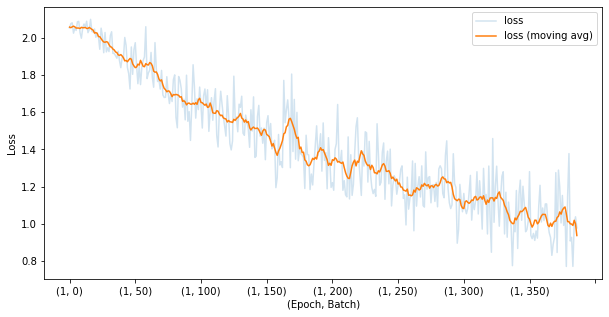

In [30]:
tracking_loss = pd.Series(tracking_loss)

plt.figure(figsize=(10, 5))
tracking_loss.plot(alpha=0.2, label="loss")
tracking_loss.rolling(center=True, min_periods=1, window=10).mean().plot(
    label="loss (moving avg)"
)
plt.xlabel("(Epoch, Batch)")
plt.ylabel("Loss")
plt.legend(loc=0);

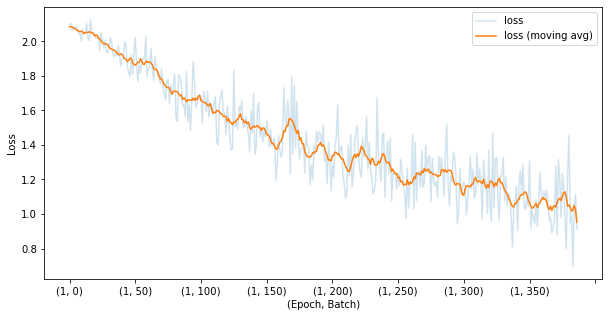

In [33]:
torch.save(model, "model.pth")

In [34]:
loaded_model = torch.load("model.pth")

In [31]:
eval_dataset = ImagesDataset(x_test, y_test)
eval_dataloader = DataLoader(eval_dataset, batch_size=32)

In [32]:
preds_collector = []

# put the model in eval mode so we don't update any parameters
model.eval()

# we aren't updating our weights so no need to calculate gradients
with torch.no_grad():
    for batch in tqdm(eval_dataloader, total=len(eval_dataloader)):
        # 1) run the forward step
        logits = model.forward(batch["image"])
        # 2) apply softmax so that model outputs are in range [0,1]
        preds = nn.functional.softmax(logits, dim=1)
        # 3) store this batch's predictions in df
        # note that PyTorch Tensors need to first be detached from their computational graph before converting to numpy arrays
        preds_df = pd.DataFrame(
            preds.detach().numpy(),
            index=batch["image_id"],
            columns=species_labels,
        )
        preds_collector.append(preds_df)

eval_preds_df = pd.concat(preds_collector)
eval_preds_df

100%|██████████| 129/129 [04:04<00:00,  1.90s/it]


,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
ZJ002631,0.082713,0.101350,0.145376,0.023511,0.072148,0.459435,0.057006,0.058461
ZJ009576,0.146989,0.260285,0.199693,0.013947,0.046413,0.066956,0.214054,0.051662
ZJ003552,0.131078,0.356111,0.121542,0.019655,0.021536,0.021520,0.113895,0.214663
ZJ006276,0.000877,0.002518,0.005084,0.000272,0.001302,0.989451,0.000321,0.000176
ZJ012035,0.078224,0.020153,0.503805,0.102164,0.062300,0.028057,0.009964,0.195332
...,...,...,...,...,...,...,...,...
ZJ014425,0.203806,0.146406,0.089308,0.001357,0.306163,0.049811,0.190923,0.012227
ZJ015087,0.098036,0.647535,0.071877,0.001454,0.013054,0.019395,0.117972,0.030677
ZJ000861,0.149147,0.138466,0.317138,0.011020,0.033465,0.023276,0.272592,0.054896
ZJ005637,0.154106,0.093993,0.069412,0.002149,0.023282,0.003322,0.634112,0.019625


In [38]:
print("True labels (training):")
y_train.idxmax(axis=1).value_counts()

True labels (training):


monkey_prosimian    1869
antelope_duiker     1855
civet_genet         1817
leopard             1690
blank               1660
rodent              1510
bird                1231
hog                  734
dtype: int64

In [39]:
print("Predicted labels (eval):")
eval_preds_df.idxmax(axis=1).value_counts()

Predicted labels (eval):


monkey_prosimian    998
civet_genet         622
leopard             578
rodent              562
bird                433
blank               406
antelope_duiker     344
hog                 179
dtype: int64

In [41]:
print("True labels (eval):")
y_test.idxmax(axis=1).value_counts()

True labels (eval):


monkey_prosimian    623
antelope_duiker     619
civet_genet         606
leopard             564
blank               553
rodent              503
bird                410
hog                 244
dtype: int64

In [33]:
eval_predictions = eval_preds_df.idxmax(axis=1)
eval_predictions.head()

ZJ002631    leopard
ZJ009576       bird
ZJ003552       bird
ZJ006276    leopard
ZJ012035      blank
dtype: object

In [34]:
# Baseline accuracy
eval_true = y_test.idxmax(axis=1)

(eval_true == "monkey_prosimian").sum() / len(eval_predictions)

0.15114022319262493

In [35]:
# Our models accuracy score
correct = (eval_predictions == eval_true).sum()
accuracy = correct / len(eval_predictions)
accuracy

0.6790393013100436

67% accuracy on our first model!

# Making a Confusion Matrix to see how our model did.

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cf_matrix = confusion_matrix(eval_true, eval_predictions)

In [38]:
confusion_matrix(eval_true, eval_predictions)

array([[242,  62,  83,  30,  24,   3, 126,  49],
       [ 24, 276,  34,   0,   0,   0,  58,  18],
       [ 36,  43, 248,  31,   8,  29,  91,  67],
       [  0,   0,   5, 540,   0,   2,   0,  59],
       [ 22,  13,  33,   0, 148,   7,  14,   7],
       [  2,   8,  26,   3,   4, 515,   4,   2],
       [ 34,  44,  60,   0,   1,   0, 475,   9],
       [  9,  38,  34,  37,   4,   0,  26, 355]], dtype=int64)

In [39]:
classes = ['Monkey Prosimian', 'Civet Genet', 'Leopard', 'Rodent',
           'Bird', 'Blank', 'Antelope Duiker', 'Hog']

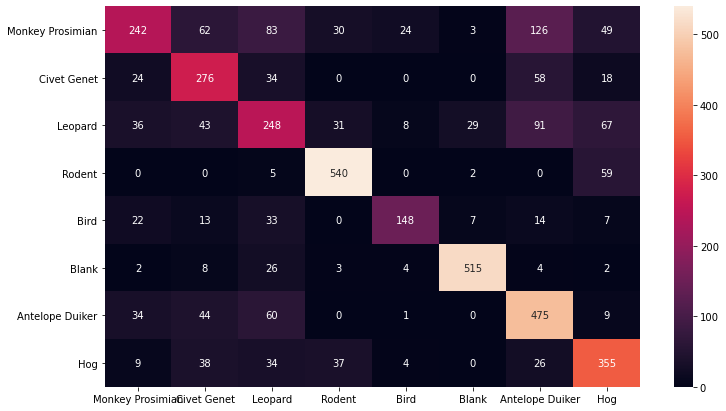

In [40]:
# Creating a confusion matrix!
df_cm2 = pd.DataFrame(cf_matrix)
plt.figure(figsize = (12,7));
sns.heatmap(cf_matrix, annot=True, fmt='', xticklabels=classes, yticklabels=classes);
plt.xticks(rotation=0)
plt.show()

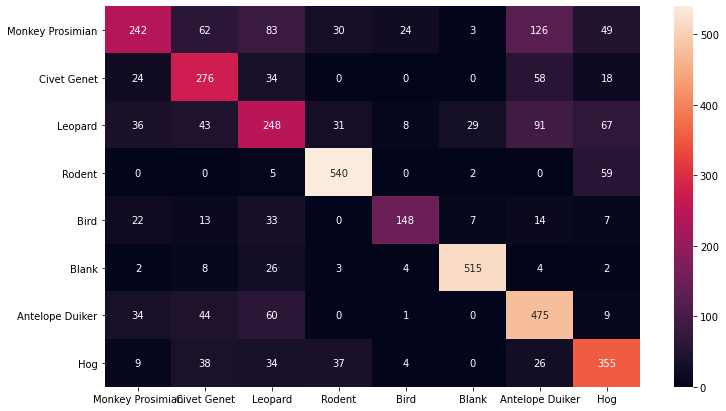

With the above heatmap we can see that our our X = Predicted values vs our Y = True values shows that our model is generally pretty good! The biggest issues we have is correctly identifying Antelope Duikers.

# Model Improvements

After successfully improving upon the baseline model, I wanted to see what I could do to keep improving our accuracy score. The first iteration I used was simply changing the epochs to 10.

In [102]:
num_epochs = 10

tracking_loss = {}

for epoch in range(1, num_epochs + 1):
    print(f"Starting epoch {epoch}")

    # iterate through the dataloader batches. tqdm keeps track of progress.
    for batch_n, batch in tqdm(
        enumerate(train_dataloader), total=len(train_dataloader)
    ):

        # 1) zero out the parameter gradients so that gradients from previous batches are not used in this step
        optimizer.zero_grad()

        # 2) run the foward step on this batch of images
        outputs = model(batch["image"])

        # 3) compute the loss
        loss = criterion(outputs, batch["label"])
        # let's keep track of the loss by epoch and batch
        tracking_loss[(epoch, batch_n)] = float(loss)

        # 4) compute our gradients
        loss.backward()
        # update our weights
        optimizer.step()

  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 1


  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 2


  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 3


  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 4


  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 5


  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 6


  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 7


  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 8


  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 9


  0%|          | 0/387 [00:00<?, ?it/s]

Starting epoch 10


100%|██████████| 387/387 [43:45<00:00,  6.78s/it]


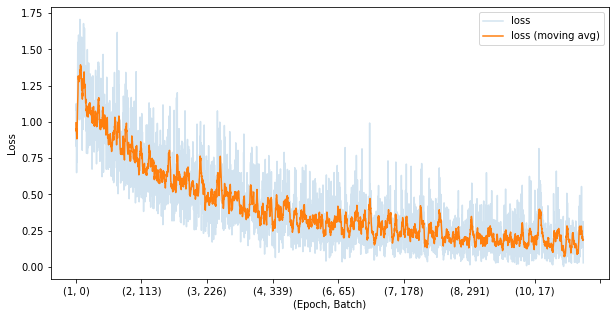

In [103]:
tracking_loss = pd.Series(tracking_loss)

plt.figure(figsize=(10, 5))
tracking_loss.plot(alpha=0.2, label="loss")
tracking_loss.rolling(center=True, min_periods=1, window=10).mean().plot(
    label="loss (moving avg)"
)
plt.xlabel("(Epoch, Batch)")
plt.ylabel("Loss")
plt.legend(loc=0);

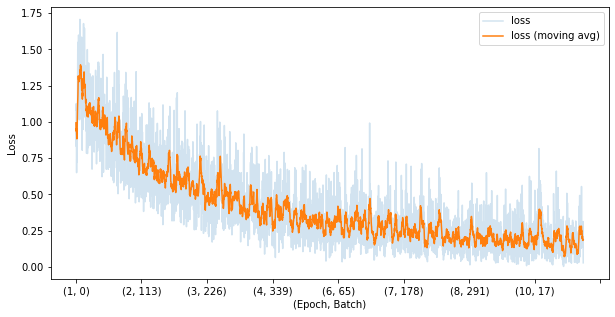

In [105]:
torch.save(model, "model10e.pth")

In [106]:
loaded_model = torch.load("model10e.pth")

In [107]:
eval_dataset1 = ImagesDataset(x_test, y_test)
eval_dataloader1 = DataLoader(eval_dataset, batch_size=32)

In [108]:
preds_collector = []

# put the model in eval mode so we don't update any parameters
model.eval()

# we aren't updating our weights so no need to calculate gradients
with torch.no_grad():
    for batch in tqdm(eval_dataloader, total=len(eval_dataloader)):
        # 1) run the forward step
        logits = model.forward(batch["image"])
        # 2) apply softmax so that model outputs are in range [0,1]
        preds = nn.functional.softmax(logits, dim=1)
        # 3) store this batch's predictions in df
        # note that PyTorch Tensors need to first be detached from their computational graph before converting to numpy arrays
        preds_df = pd.DataFrame(
            preds.detach().numpy(),
            index=batch["image_id"],
            columns=species_labels,
        )
        preds_collector.append(preds_df)

eval_preds_df = pd.concat(preds_collector)
eval_preds_df

100%|██████████| 129/129 [03:52<00:00,  1.80s/it]


,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
ZJ002631,0.003364,4.645763e-03,0.111706,6.175337e-04,9.221320e-04,0.873868,3.235929e-03,1.640748e-03
ZJ009576,0.011713,1.462641e-02,0.004362,1.587901e-06,6.797996e-04,0.000880,9.672822e-01,4.550288e-04
ZJ003552,0.000022,9.995131e-01,0.000017,4.340330e-07,2.974671e-07,0.000015,3.977552e-04,3.440623e-05
ZJ006276,0.000001,5.135988e-07,0.000131,3.945132e-06,3.300784e-07,0.999862,5.752919e-08,9.834739e-07
ZJ012035,0.232309,6.947710e-03,0.542068,9.675163e-04,1.677641e-04,0.000620,2.032358e-01,1.368486e-02
...,...,...,...,...,...,...,...,...
ZJ014425,0.002243,2.954070e-06,0.000438,3.586076e-05,9.927629e-01,0.004354,5.714276e-05,1.058208e-04
ZJ015087,0.001152,9.971604e-01,0.000136,5.011821e-08,5.167465e-07,0.000027,1.516160e-03,8.364677e-06
ZJ000861,0.001247,1.737866e-05,0.000436,6.373014e-09,7.846320e-06,0.000013,9.982768e-01,1.370395e-06
ZJ005637,0.000007,8.649075e-08,0.000003,1.692359e-09,1.148457e-07,0.000005,9.999838e-01,8.024790e-08


In [109]:
print("True labels (training):")
y_train.idxmax(axis=1).value_counts()

True labels (training):


monkey_prosimian    1869
antelope_duiker     1855
civet_genet         1817
leopard             1690
blank               1660
rodent              1510
bird                1231
hog                  734
dtype: int64

True labels (training):<br>
monkey_prosimian    1869<br>
antelope_duiker     1855<br>
civet_genet         1817<br>
leopard             1690<br>
blank               1660<br>
rodent              1510<br>
bird                1231<br>
hog                  734<br>
dtype: int64

In [110]:
print("Predicted labels (eval):")
eval_preds_df.idxmax(axis=1).value_counts()

Predicted labels (eval):


monkey_prosimian    684
civet_genet         655
antelope_duiker     579
leopard             565
rodent              544
blank               456
bird                405
hog                 234
dtype: int64

monkey_prosimian    684<br>
civet_genet         655<br>
antelope_duiker     579<br>
leopard             565<br>
rodent              544<br>
blank               456<br>
bird                405<br>
hog                 234<br>
dtype: int64

In [111]:
print("True labels (eval):")
y_test.idxmax(axis=1).value_counts()

True labels (eval):


monkey_prosimian    623
antelope_duiker     619
civet_genet         606
leopard             564
blank               553
rodent              503
bird                410
hog                 244
dtype: int64

True labels (eval):<br>
monkey_prosimian    623<br>
antelope_duiker     619<br>
civet_genet         606<br>
leopard             564<br>
blank               553<br>
rodent              503<br>
bird                410<br>
hog                 244<br>
dtype: int64

In [112]:
eval_predictions = eval_preds_df.idxmax(axis=1)
eval_predictions.head()

ZJ002631             leopard
ZJ009576    monkey_prosimian
ZJ003552                bird
ZJ006276             leopard
ZJ012035               blank
dtype: object

In [114]:
correct = (eval_predictions == eval_true).sum()
accuracy = correct / len(eval_predictions)
accuracy

0.861475012130034

In [115]:
cf_matrix = confusion_matrix(eval_true, eval_predictions)

In [116]:
confusion_matrix(eval_true, eval_predictions)

array([[469,  13,  52,  20,   4,   3,  47,  11],
       [  3, 374,  14,   0,   0,   1,  15,   3],
       [ 66,  10, 326,  26,   2,  23,  52,  48],
       [  2,   0,   0, 592,   0,   0,   0,  12],
       [  7,   0,   6,   3, 226,   2,   0,   0],
       [  4,   1,  15,   3,   0, 535,   5,   1],
       [ 24,   6,  27,   0,   1,   1, 562,   2],
       [  4,   1,  16,  11,   1,   0,   3, 467]], dtype=int64)

array([[469,  13,  52,  20,   4,   3,  47,  11],<br>
       [  3, 374,  14,   0,   0,   1,  15,   3],<br>
       [ 66,  10, 326,  26,   2,  23,  52,  48],<br>
       [  2,   0,   0, 592,   0,   0,   0,  12],<br>
       [  7,   0,   6,   3, 226,   2,   0,   0],<br>
       [  4,   1,  15,   3,   0, 535,   5,   1],<br>
       [ 24,   6,  27,   0,   1,   1, 562,   2],<br>
       [  4,   1,  16,  11,   1,   0,   3, 467]], dtype=int64)

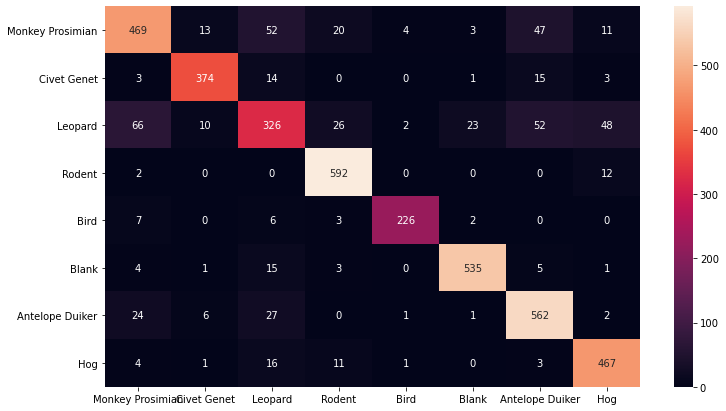

In [119]:
# Creating a confusion matrix!
df_cm2 = pd.DataFrame(cf_matrix)
plt.figure(figsize = (12,7));
sns.heatmap(cf_matrix, annot=True, fmt='', xticklabels=classes, yticklabels=classes);
plt.xticks(rotation=0)
plt.show()

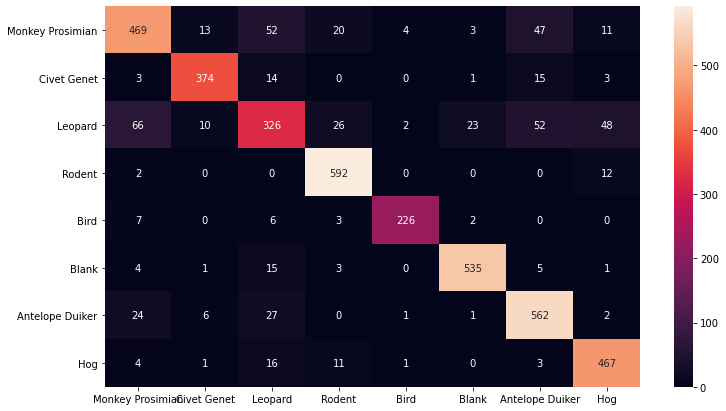